In [2]:
from nicosload import read_pad_file
import matplotlib.pyplot as plt
import numpy as np
from datafile import Datafile


In [1]:
import matplotlib
matplotlib.use('qt5agg')
%matplotlib qt
plt.plot(range(3))
plt.show()

In [2]:
import matplotlib

matplotlib.use('qt5agg')
plt.plot(range(3))

In [2]:
from nicosload import read_nicos_file,read_pad_file

In [3]:
%matplotlib inline
plt.ioff()
all_areas = np.zeros((11,81))
all_centers = np.zeros((11,81))
all_amplitudes = np.zeros((11,81))
all_sigmas = np.zeros((11,81))
all_amplitudesErr = np.zeros_like(all_amplitudes)

dtx_vals = [k for k in range(10,260,30)]+[400,600]
sth_vals = np.linspace(-0.2,-1.8,81)
for file in range(4814,5705):
    break
    dtx_ind,sth_ind = divmod(file-4814,81)
    print(file,dtx_vals[dtx_ind],sth_vals[sth_ind])
for file in range(4814,5705):
    
    dtx_ind,sth_ind = divmod(file-4814,81)
    data,meta = read_pad_file('data/pad_files/0032{}.pad'.format(file))
    integrated = np.sum(data,axis = 0)
    dat1 = Datafile('asdf')
    dat1.fig,dat1.ax = plt.subplots(1,1)
    res = dat1.fit_gauss([k for k in range(len(integrated))],integrated,peaks = 2,\
                         plotout=False, errs= integrated**0.5,xlabel = 'x',vlines = False)
    centers = [res.params['g0_center'].value,res.params['g1_center'].value]
    areas = [res.params['g0_area'].value,res.params['g1_area'].value]
    amplitudes = [res.params['g0_area'].value /res.params['g0_sigma'].value,\
                 res.params['g1_area'].value /res.params['g1_sigma'].value]
    
    cenErr = [res.params['g0_center'].stderr,res.params['g1_center'].stderr]
    areaErr= [res.params['g0_area'].stderr,res.params['g1_area'].stderr]
    ampErr = [amplitudes[i]* ((cenErr[i]/centers[i])**2 + (areaErr[i]/areas[i])**2)**0.5 for i in range(2)]
    
    
    sigmas = [res.params['g0_sigma'].value,res.params['g1_sigma'].value]
    i = centers.index(max(centers))
    
    
    print('dtx',dtx_vals[dtx_ind],'sth',sth_vals[sth_ind],centers[i])
    all_sigmas[dtx_ind,sth_ind] = sigmas[i]
    all_amplitudes[dtx_ind,sth_ind] = amplitudes[i]
    all_amplitudesErr[dtx_ind,sth_ind]= ampErr[i]
    all_areas[dtx_ind,sth_ind] = areas[i]
    all_centers[dtx_ind,sth_ind] = centers[i]
    
    
    
    #dat1.fig.savefig('data/pad_files/0032{}.pdf'.format(file),bbox_inches = 'tight')
    plt.close(dat1.fig)
    #all_amplitudes(sigma*(2*np.pi)**0.5)
    #plt.plot(integrated)
#save the data 
#np.savetxt()
np.savetxt('fit_data/amps',all_amplitudes)
np.savetxt('fit_data/amp_err',all_amplitudesErr)
np.savetxt('fit_data/sigmas',all_sigmas)
np.savetxt('fit_data/centers',all_centers)

0 sth -1.1400000000000001 82.92807255634088
dtx 130 sth -1.16 83.22470997724696
dtx 130 sth -1.18 83.51757735349639
dtx 130 sth -1.2 83.79298877693246
dtx 130 sth -1.22 84.06499076055968
dtx 130 sth -1.24 84.36129415076172
dtx 130 sth -1.26 84.64892071174205
dtx 130 sth -1.28 84.93092624001295
dtx 130 sth -1.3 85.22709709539166
dtx 130 sth -1.32 85.52412977824349
dtx 130 sth -1.34 85.81028427776121
dtx 130 sth -1.3599999999999999 86.10461750499871
dtx 130 sth -1.38 86.41185634921108
dtx 130 sth -1.4 86.70845527221621
dtx 130 sth -1.42 86.99085057064558
dtx 130 sth -1.44 87.28872760953335
dtx 130 sth -1.46 87.57889334031343
dtx 130 sth -1.48 87.86080052036971
dtx 130 sth -1.5 88.14317506737659
dtx 130 sth -1.52 88.44672289112194
dtx 130 sth -1.54 88.74010059493888
dtx 130 sth -1.56 89.02492712541826
dtx 130 sth -1.58 89.3236715779156
dtx 130 sth -1.6 89.60726589884516
dtx 130 sth -1.6199999999999999 89.87974070191788
dtx 130 sth -1.64 90.15428970187386
dtx 130 sth -1.66 90.4366284727253

In [3]:
np.savetxt('fit_data/amps',all_amplitudes)
np.savetxt('fit_data/amp_err',all_amplitudesErr)
np.savetxt('fit_data/sigmas',all_sigmas)
np.savetxt('fit_data/centers',all_centers)

NameError: name &#39;all_amplitudes&#39; is not defined

In [1]:
#%matplotlib qt
#plt.style.use('/home/cherb/anaconda3/pkgs/matplotlib-3.1.0-py37h5429711_0/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/christoph.mplstyle')
from nicosload import read_nicos_file,read_pad_file
%matplotlib inline
dtx_vals = [k for k in range(10,260,30)]+[400,600]
sth_vals = np.linspace(-0.2,-1.8,81)

all_amplitudes = np.loadtxt('fit_data/amps')
all_amplitudesErr = np.loadtxt('fit_data/amp_err')
all_sigmas = np.loadtxt('fit_data/centers')
all_centers = np.loadtxt('fit_data/sigmas')
plt.switch_backend('Qt5Agg')

################################### nice image colour plot ######################################
fig = plt.figure(figsize = (10,4))
ax = fig.add_subplot(1,1,1)



font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}
im= ax.imshow(all_amplitudes[:,::-1]/10**6,extent=(0,len(sth_vals),0,len(dtx_vals)),aspect = 'auto')

ax.set_xlabel('sth (deg)')
ax.set_ylabel('dtx (mm)')
ax.tick_params(axis='x', rotation=45)
ax.axes.yaxis.set_ticks([k+0.5 for k in range(0,11)])
ax.axes.yaxis.set_ticklabels([k + 470 for k in dtx_vals][::])
ax.grid()
#ax.set_title([k + 470 for k in range(10,260,30)]+[870,1070])
#ax.set_title('Amplitude map')
fig.tight_layout()
fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Mieze/Mieze_Foc/images/paper/firstnightMap.pdf',bbox_inches = 'tight')

############################ Contour plot #####################################################ä#
#fig = plt.figure(figsize = (10,4))
#ax = fig.add_subplot(1,1,1)



font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

bl= ax.contour(all_amplitudes[::-1,::-1]/10**6, extent=(0,len(sth_vals),0,len(dtx_vals)), colors = 'black',aspect = 'auto',levels = 10,\
              linewidths = 1)
#cl= ax.contour(all_amplitudes[::-1,::-1]/10**6,extent=(0,len(sth_vals),0,len(dtx_vals)),aspect = 'auto',levels = 10,linewidths = 1)
#cb = fig.colorbar(im)
ax.set_xlabel('sth (deg)')
ax.set_ylabel('dtx (mm)')

ax.tick_params(axis='x', rotation=45)

ax.axes.yaxis.set_ticks([k+0.5 for k in range(len(dtx_vals))])
ax.axes.yaxis.set_ticklabels([k + 470 for k in dtx_vals][::-1])

ax.axes.xaxis.set_ticks([k+0.5 for k in range(0,len(sth_vals),4)])
ax.axes.xaxis.set_ticklabels([round(k,2) for k in sth_vals][::-4])
#ax.axes.yaxis.set_ticks([k+0.5 for k in range(0,11)])
#ax.axes.yaxis.set_ticklabels([k + 470 for k in dtx_vals][::-1])
ax.grid()
#ax.set_title([k + 470 for k in range(10,260,30)]+[870,1070])
#ax.set_title('Amplitude map')
cb = fig.colorbar(im)
cb.add_lines(bl)
#cb2 = fig.colorbar(bl,)
fig.tight_layout()
fig.savefig("paper_images/firstnight.pdf",bbox_inches = 'tight')

In [ ]:
import matplotlib
%matplotlib inline
plt.plot(range(10))
plt.show()

In [ ]:
################################### multiplot #################################################



fig,ax = plt.subplots(1,1)
colormap = plt.cm.viridis
#ax.set_prop_cycle(color =[colormap(i) for i in np.linspace(0, 1, len(all_amplitudes))][::-1])  
for line in range(11):
    
    ax.errorbar(np.linspace(-0.2,-1.8,81),all_amplitudes[line,:]/10**6,\
                all_amplitudesErr[line,:]/10**6,label = dtx_vals[line]+470,\
                marker = '',linestyle = '-',linewidth = 2,elinewidth = 0.5)
ax.text(-1.1,0.8,'sth = -1.12 deg')
#ax.set_xlim(-0.8,-1.4)
#ax.set_ylim(1100000,1650000)
ax.legend(fontsize = 12,loc = (1.01,0))
ax.set_xlabel('sth (deg)')
ax.set_ylabel('Peak amplitude (arb. u.)')
maxLine = ax.axvline(-1.12,-1,2,color = 'black')
maxLine.set_dashes([4,4])
fig.tight_layout()
fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Mieze/Mieze_Foc/images/paper/firstnightParmap.pdf',bbox_inches = 'tight')
fig,ax = plt.subplots(1,1)
data,mes = read_pad_file('data/pad_files/0032{}.pad'.format(5184))
ax.set_title('dtx = {} mm, sth = {} deg'.format(mes['dtx_value']+470,mes['sth_value']))
im = ax.imshow(np.log(data[::-1,:]))
cb = fig.colorbar(im)
ax.axes.xaxis.set_ticks([k for k in range(0,140,20)])
ax.axes.yaxis.set_ticks([k for k in range(0,140,20)])
fig.tight_layout()
print('lasd',mes['dtx_value'],mes['sth_value'])
fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Mieze/Mieze_Foc/images/paper/focus.pdf')
#print(sth_vals[47],dtx_vals[4])

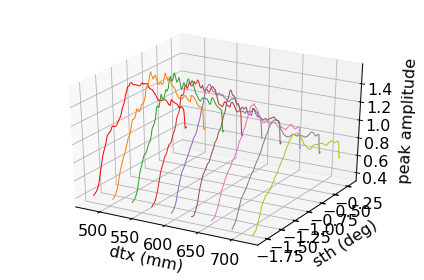

In [4]:
################################### 3Dplot #################################################

from nicosload import read_nicos_file,read_pad_file
dtx_vals = [k for k in range(10,260,30)]+[400,600]
sth_vals = np.linspace(-0.2,-1.8,81)

all_amplitudes = np.loadtxt('fit_data/amps')
all_amplitudesErr = np.loadtxt('fit_data/amp_err')
all_sigmas = np.loadtxt('fit_data/centers')
all_centers = np.loadtxt('fit_data/sigmas')

fig = plt.figure()
ax = fig.add_subplot(111,projection = '3d',)
colormap = plt.cm.viridis
#ax.set_prop_cycle(color =[colormap(i) for i in np.linspace(0, 1, len(all_amplitudes))][::-1])  
for line in range(9):
    xs = np.array([dtx_vals[line]+470]*81)
    ys = np.linspace(-0.2,-1.8,81)
    zs = all_amplitudes[line,:]/10**6
    ax.plot(xs,ys,zs,linestyle = '-', marker = ' ')
ax.set_xlabel('dtx (mm)',rotation = 45)
ax.set_ylabel('sth (deg)')
ax.set_zlabel('peak amplitude')

ax.axes.xaxis.labelpad=10
ax.axes.yaxis.labelpad=15
ax.axes.zaxis.labelpad=10
#ax.set_axis_on()
#ax.set_xticklabels([])
ax.axes.xaxis.line.set_color("black")
ax.axes.xaxis.line.set_marker(' ')
ax.axes.yaxis.line.set_color("black")
ax.axes.yaxis.line.set_marker(' ')
ax.axes.zaxis.line.set_color("black")
ax.axes.zaxis.line.set_marker(' ')
ax.dist = 11
plt.tight_layout()
fig.savefig('/home/cherb/Desktop/LRZ Sync+Share/Doktorarbeit/Mieze/Mieze_Foc/images/paper/3D_firstnight.pdf')

In [11]:
%matplotlib inline
plt.style.use('/home/cherb/anaconda3/pkgs/matplotlib-3.1.0-py37h5429711_0/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/christoph_3d.mplstyle')
fig = plt.figure(figsize = (50,15))
ax = fig.add_subplot(1,1,1)
ax.imshow(np.log(all_areas[:,:]))
sth_vals = np.linspace(-0.2,-1.8,81)

dtx_vals = [k for k in range(10,260,30)]+[400,600]
fig,ax = plt.subplots(1,1)
for line in range(11):
    
    ax.plot(np.linspace(-0.2,-1.8,81),all_areas[line,:],label = dtx_vals[line],marker = '',linestyle = '-',linewidth = 2)
#ax.set_xlim(-0.8,-1.4)
#ax.set_ylim(1100000,1650000)
ax.legend(fontsize = 16)
print(sth_vals[47],dtx_vals[4])

NameError: name 'all_areas' is not defined